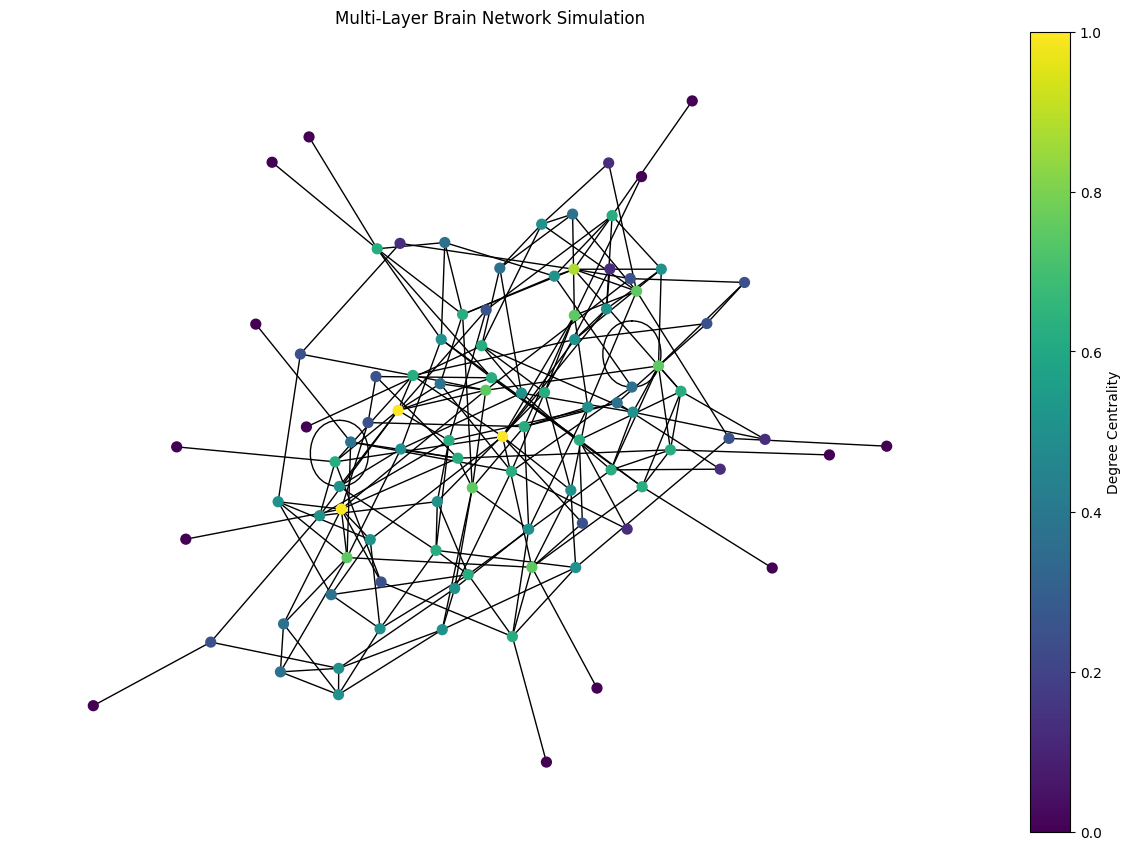

([13, 16, 26, 8, 27, 34, 38, 39, 47, 51],
 array([0.01991576, 0.19436114, 0.11216462, 0.19680739, 0.195461  ,
        0.11767966, 0.19469006, 0.12956023, 0.10886518, 0.13508544]))

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Implement a Multi-Layer Network
# Creating two layers in the network to represent different types of neurons
layer_1 = nx.watts_strogatz_graph(50, 4, 0.1)
layer_2 = nx.watts_strogatz_graph(50, 4, 0.1)

# Connecting layers with random edges
for _ in range(100):
    node1 = np.random.choice(layer_1.nodes())
    node2 = np.random.choice(layer_2.nodes())
    layer_1.add_edge(node1, node2 + 50)  # Offset for layer 2 nodes

# Combine layers into a single network
multi_layer_network = nx.compose(layer_1, layer_2)

# Step 2: Introduce Time-Dependent Dynamics
# Simulate a basic form of synaptic plasticity
def update_synaptic_weights(network, decay_factor=0.99, growth_factor=1.01):
    for u, v in network.edges():
        if 'weight' not in network[u][v]:
            network[u][v]['weight'] = 1.0  # Initialize weight
        # Decay or grow weights randomly
        network[u][v]['weight'] *= decay_factor if np.random.rand() > 0.5 else growth_factor

# Step 3: Simulate External Perturbations
external_stimulus = np.random.rand(100) * 0.2  # Random stimulus for 100 nodes

# Step 4: Data Analysis
# Identifying hubs in the network
degree_centralities = nx.degree_centrality(multi_layer_network)
hubs = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]

# Step 5: Advanced Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(multi_layer_network)
nx.draw(multi_layer_network, pos, node_size=50, with_labels=False, node_color=[degree_centralities[n] for n in multi_layer_network.nodes()], cmap='viridis')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), label='Degree Centrality')
plt.title("Multi-Layer Brain Network Simulation")
plt.show()

hubs, external_stimulus[:10]  # Displaying the top 10 hubs and the first 10 external stimuli values


# New Section